## Problem 1 : Less data to train

### Solution : Data Augmentation

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading in the Emergency dataset

data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [3]:
# Checking the first 5 rows of the dataset

data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [4]:
# checking the shape of the dataset

data.shape

(2352, 2)

In [5]:
# Let's first check the number of images per class

data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [6]:
# Extracting the name and target of a random image in the data dataframe

random_id = 777 #index of random image 

img_name = data['image_names'].iloc[random_id]
target = data['emergency_or_not'].iloc[random_id]

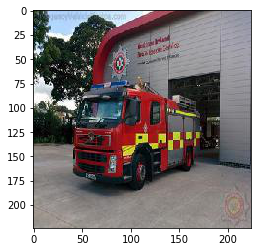

In [7]:
# Reading and plotting the random image

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

plt.imshow(img)
plt.show()

In [8]:
# Checking shape of the image

img.shape

(224, 224, 3)

In [9]:
# Importing the ImageDataGenerator for Image Augmentation

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Augmentations

1. rotation_range - Degree range for random rotations
2. width_shift_range - float or integer
3. height_shift_range - float or integer
4. horizontal_flip - Boolean

In [10]:
# Intializing the ImageDataGenerator object with the Augmentations that we want.

# 1. rotation_range

datagen = ImageDataGenerator(shear_range=0.5)

In [11]:
# Reshaping the image to allow for iteration

img = img.reshape((1,)+img.shape)

In [12]:
#checking the shape of the reshaped array

img.shape

(1, 224, 224, 3)

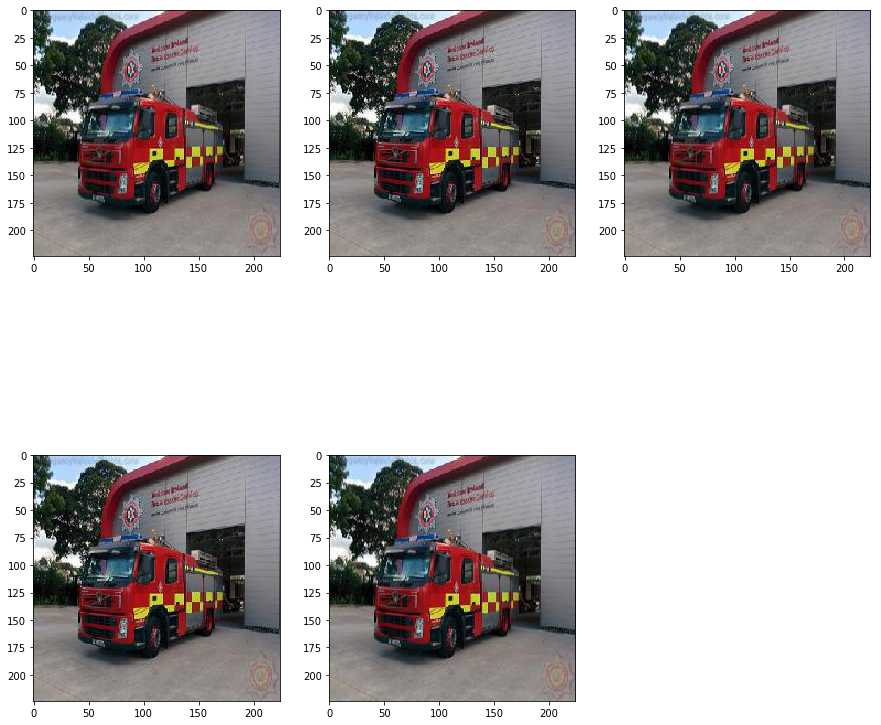

In [13]:
#Let's generate 5 randomly rotated images of our array.

f = plt.figure(figsize = (15,15))

count = 0
for x, y in datagen.flow(img,[target], batch_size=1):
    if count ==5:
        break
    
    count += 1
    f.add_subplot(230+count)
    plt.imshow(x.reshape(224,224,3).astype(int))
plt.show()

## Problem 2 - Lots of Variation in Data

In [15]:
img = plt.imread('images/emergency_100.jpg')

plt.imshow(img)
p.show()

NameError: name 'pylab' is not defined

In [ ]:
img.shape

In [ ]:
img = imread('images/emergency_1000.jpg')

pylab.imshow(img)
pylab.show()

In [ ]:
img.shape

In [ ]:
from keras.preprocessing import image

In [ ]:
image.load_img('images/emergency_100.jpg', target_size=(224, 224))

In [ ]:
image.load_img('images/emergency_1000.jpg', target_size=(224, 224))

In [ ]:
# transformation?

## Problem 3 - Overfitting

### Dropout

In [1]:
%pylab inline

import pandas as pd

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [3]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [4]:
images = []
for img_loc in data.image_names:
    img = image.load_img('../datasets/emergency_classification/images/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [5]:
train_x = images.reshape(2352, 100*100*3)

In [6]:
train_x /= train_x.max()
train_y = data.emergency_or_not.values

In [7]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [8]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6793 - acc: 0.5960 - val_loss: 0.6466 - val_acc: 0.6516
Epoch 2/500
1646/1646 [==============================] - 0s 166us/step - loss: 0.6385 - acc: 0.6409 - val_loss: 0.6272 - val_acc: 0.6572
Epoch 3/500
1646/1646 [==============================] - 0s 192us/step - loss: 0.6278 - acc: 0.6574 - val_loss: 0.6510 - val_acc: 0.6034
Epoch 4/500
1646/1646 [==============================] - 0s 172us/step - loss: 0.6123 - acc: 0.6683 - val_loss: 0.6048 - val_acc: 0.6898
Epoch 5/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.6050 - acc: 0.6756 - val_loss: 0.6006 - val_acc: 0.6827
Epoch 6/500
1646/1646 [==============================] - 0s 187us/step - loss: 0.6009 - acc: 0.6810 - val_loss: 0.5922 - val_acc: 0.6926
Epoch 7/500
1646/1646 [==============================] - 0s 173us/step - loss: 0.5978 - acc: 0.6932 - val_loss: 0.5929 - val_acc: 0.6

1646/1646 [==============================] - 0s 134us/step - loss: 0.4062 - acc: 0.8135 - val_loss: 0.5704 - val_acc: 0.7082
Epoch 120/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.3457 - acc: 0.8724 - val_loss: 0.6695 - val_acc: 0.6629
Epoch 121/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.3460 - acc: 0.8670 - val_loss: 0.5405 - val_acc: 0.7139
Epoch 122/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.3456 - acc: 0.8633 - val_loss: 0.5755 - val_acc: 0.7110
Epoch 123/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.3820 - acc: 0.8354 - val_loss: 0.5879 - val_acc: 0.7025
Epoch 124/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.4175 - acc: 0.7965 - val_loss: 0.7249 - val_acc: 0.6487
Epoch 125/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.4201 - acc: 0.8141 - val_loss: 0.6259 - val_acc: 0.6827
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 153us/step - loss: 0.2799 - acc: 0.9113 - val_loss: 0.5388 - val_acc: 0.7252
Epoch 179/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.2627 - acc: 0.9235 - val_loss: 0.5305 - val_acc: 0.7351
Epoch 180/500
1646/1646 [==============================] - 0s 193us/step - loss: 0.2669 - acc: 0.9143 - val_loss: 0.5544 - val_acc: 0.7295
Epoch 181/500
1646/1646 [==============================] - 0s 170us/step - loss: 0.4488 - acc: 0.7710 - val_loss: 0.8274 - val_acc: 0.5935
Epoch 182/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.4656 - acc: 0.7649 - val_loss: 0.5424 - val_acc: 0.7252
Epoch 183/500
1646/1646 [==============================] - 0s 155us/step - loss: 0.3309 - acc: 0.8627 - val_loss: 0.6537 - val_acc: 0.6686
Epoch 184/500
1646/1646 [==============================] - 0s 155us/step - loss: 0.3104 - acc: 0.8676 - val_loss: 0.5715 - val_acc: 0.7153
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 173us/step - loss: 0.2996 - acc: 0.8633 - val_loss: 0.9340 - val_acc: 0.5864
Epoch 238/500
1646/1646 [==============================] - 0s 181us/step - loss: 0.3503 - acc: 0.8433 - val_loss: 1.0565 - val_acc: 0.6133
Epoch 239/500
1646/1646 [==============================] - 0s 188us/step - loss: 0.3857 - acc: 0.8062 - val_loss: 0.5612 - val_acc: 0.7309
Epoch 240/500
1646/1646 [==============================] - 0s 182us/step - loss: 0.2383 - acc: 0.9192 - val_loss: 0.5601 - val_acc: 0.7351
Epoch 241/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.4237 - acc: 0.7861 - val_loss: 0.5300 - val_acc: 0.7507
Epoch 242/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.2630 - acc: 0.8985 - val_loss: 0.5373 - val_acc: 0.7479
Epoch 243/500
1646/1646 [==============================] - 0s 171us/step - loss: 0.2125 - acc: 0.9368 - val_loss: 0.7666 - val_acc: 0.6686
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 165us/step - loss: 0.1792 - acc: 0.9538 - val_loss: 0.6414 - val_acc: 0.7167
Epoch 297/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.1692 - acc: 0.9575 - val_loss: 0.5596 - val_acc: 0.7394
Epoch 298/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.2664 - acc: 0.8894 - val_loss: 0.8146 - val_acc: 0.6671
Epoch 299/500
1646/1646 [==============================] - 0s 171us/step - loss: 0.2375 - acc: 0.8998 - val_loss: 0.5749 - val_acc: 0.7465
Epoch 300/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.1553 - acc: 0.9593 - val_loss: 0.5887 - val_acc: 0.7408
Epoch 301/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.2280 - acc: 0.9113 - val_loss: 0.5532 - val_acc: 0.7408
Epoch 302/500
1646/1646 [==============================] - 0s 167us/step - loss: 0.2721 - acc: 0.8840 - val_loss: 1.2078 - val_acc: 0.6105
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 179us/step - loss: 0.2499 - acc: 0.9010 - val_loss: 0.5675 - val_acc: 0.7535
Epoch 356/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.1165 - acc: 0.9824 - val_loss: 0.5760 - val_acc: 0.7521
Epoch 357/500
1646/1646 [==============================] - 0s 183us/step - loss: 0.1577 - acc: 0.9557 - val_loss: 0.8962 - val_acc: 0.6161
Epoch 358/500
1646/1646 [==============================] - 0s 171us/step - loss: 0.4155 - acc: 0.8013 - val_loss: 0.6136 - val_acc: 0.7408
Epoch 359/500
1646/1646 [==============================] - 0s 162us/step - loss: 0.1269 - acc: 0.9757 - val_loss: 0.5687 - val_acc: 0.7450
Epoch 360/500
1646/1646 [==============================] - 0s 174us/step - loss: 0.1462 - acc: 0.9544 - val_loss: 0.5654 - val_acc: 0.7450
Epoch 361/500
1646/1646 [==============================] - 0s 180us/step - loss: 0.1178 - acc: 0.9793 - val_loss: 0.5676 - val_acc: 0.7465
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 188us/step - loss: 0.5565 - acc: 0.8196 - val_loss: 0.5719 - val_acc: 0.7550
Epoch 415/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.0946 - acc: 0.9885 - val_loss: 0.5827 - val_acc: 0.7507
Epoch 416/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.0948 - acc: 0.9866 - val_loss: 0.7042 - val_acc: 0.7280
Epoch 417/500
1646/1646 [==============================] - 0s 182us/step - loss: 0.0965 - acc: 0.9854 - val_loss: 0.5855 - val_acc: 0.7507
Epoch 418/500
1646/1646 [==============================] - 0s 175us/step - loss: 0.0954 - acc: 0.9885 - val_loss: 0.6102 - val_acc: 0.7266
Epoch 419/500
1646/1646 [==============================] - 0s 173us/step - loss: 0.0930 - acc: 0.9897 - val_loss: 0.5869 - val_acc: 0.7479
Epoch 420/500
1646/1646 [==============================] - 0s 167us/step - loss: 0.0855 - acc: 0.9945 - val_loss: 0.6021 - val_acc: 0.7521
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 175us/step - loss: 0.0724 - acc: 0.9957 - val_loss: 0.6224 - val_acc: 0.7465
Epoch 474/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.0765 - acc: 0.9921 - val_loss: 0.6192 - val_acc: 0.7493
Epoch 475/500
1646/1646 [==============================] - 0s 171us/step - loss: 0.0662 - acc: 0.9964 - val_loss: 0.6595 - val_acc: 0.7479
Epoch 476/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.0650 - acc: 0.9970 - val_loss: 0.6456 - val_acc: 0.7465
Epoch 477/500
1646/1646 [==============================] - 0s 178us/step - loss: 0.0654 - acc: 0.9951 - val_loss: 0.6761 - val_acc: 0.7436
Epoch 478/500
1646/1646 [==============================] - 0s 167us/step - loss: 0.0685 - acc: 0.9945 - val_loss: 0.6859 - val_acc: 0.7408
Epoch 479/500
1646/1646 [==============================] - 0s 170us/step - loss: 0.0701 - acc: 0.9921 - val_loss: 0.6092 - val_acc: 0.7450
Epoch 480/500
1646/1646 [================

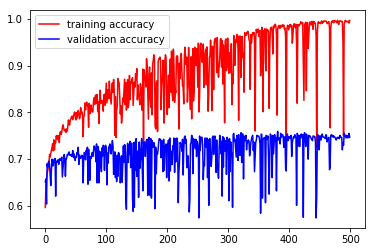

In [10]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

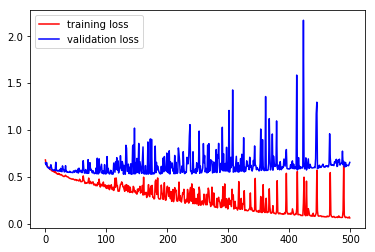

In [11]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

In [12]:
from keras.layers import Dropout

In [14]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
#model.add(Dropout(0.8))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 1s 316us/step - loss: 0.7100 - acc: 0.5863 - val_loss: 0.6916 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.6747 - acc: 0.5863 - val_loss: 0.6805 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.6707 - acc: 0.5863 - val_loss: 0.6763 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 147us/step - loss: 0.6686 - acc: 0.5863 - val_loss: 0.6735 - val_acc: 0.5609
Epoch 5/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.6669 - acc: 0.5857 - val_loss: 0.6721 - val_acc: 0.5609
Epoch 6/500
1646/1646 [==============================] - 0s 182us/step - loss: 0.6652 - acc: 0.5863 - val_loss: 0.6702 - val_acc: 0.5609
Epoch 7/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.6637 - acc: 0.5857 - val_loss: 0.6693 - val_acc: 0

1646/1646 [==============================] - 0s 132us/step - loss: 0.5941 - acc: 0.7108 - val_loss: 0.6060 - val_acc: 0.6700
Epoch 61/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.5930 - acc: 0.7102 - val_loss: 0.6070 - val_acc: 0.6657
Epoch 62/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.5917 - acc: 0.7108 - val_loss: 0.6034 - val_acc: 0.6686
Epoch 63/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.5905 - acc: 0.7120 - val_loss: 0.6031 - val_acc: 0.6700
Epoch 64/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.5891 - acc: 0.7157 - val_loss: 0.6010 - val_acc: 0.6785
Epoch 65/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.5882 - acc: 0.7151 - val_loss: 0.6014 - val_acc: 0.6742
Epoch 66/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.5872 - acc: 0.7163 - val_loss: 0.6006 - val_acc: 0.6742
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 142us/step - loss: 0.4790 - acc: 0.7916 - val_loss: 0.5547 - val_acc: 0.7096
Epoch 179/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.4779 - acc: 0.7886 - val_loss: 0.5593 - val_acc: 0.6941
Epoch 180/500
1646/1646 [==============================] - 0s 170us/step - loss: 0.4790 - acc: 0.7861 - val_loss: 0.5593 - val_acc: 0.6941
Epoch 181/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.4764 - acc: 0.7874 - val_loss: 0.5497 - val_acc: 0.7110
Epoch 182/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.4745 - acc: 0.7861 - val_loss: 0.5520 - val_acc: 0.7139
Epoch 183/500
1646/1646 [==============================] - 0s 167us/step - loss: 0.4758 - acc: 0.7892 - val_loss: 0.5454 - val_acc: 0.7110
Epoch 184/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.4734 - acc: 0.7977 - val_loss: 0.5456 - val_acc: 0.7068
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 155us/step - loss: 0.4157 - acc: 0.8348 - val_loss: 0.5394 - val_acc: 0.7153
Epoch 238/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.4154 - acc: 0.8366 - val_loss: 0.5414 - val_acc: 0.7181
Epoch 239/500
1646/1646 [==============================] - 0s 155us/step - loss: 0.4128 - acc: 0.8335 - val_loss: 0.5348 - val_acc: 0.7252
Epoch 240/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.4123 - acc: 0.8384 - val_loss: 0.5379 - val_acc: 0.7181
Epoch 241/500
1646/1646 [==============================] - 0s 167us/step - loss: 0.4125 - acc: 0.8390 - val_loss: 0.5385 - val_acc: 0.7139
Epoch 242/500
1646/1646 [==============================] - 0s 185us/step - loss: 0.4097 - acc: 0.8420 - val_loss: 0.5521 - val_acc: 0.7110
Epoch 243/500
1646/1646 [==============================] - 0s 155us/step - loss: 0.4093 - acc: 0.8426 - val_loss: 0.5535 - val_acc: 0.7096
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 171us/step - loss: 0.3447 - acc: 0.8773 - val_loss: 0.5278 - val_acc: 0.7323
Epoch 297/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3359 - acc: 0.8876 - val_loss: 0.5268 - val_acc: 0.7295
Epoch 298/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.3368 - acc: 0.8882 - val_loss: 0.5310 - val_acc: 0.7309
Epoch 299/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.3351 - acc: 0.8900 - val_loss: 0.5349 - val_acc: 0.7252
Epoch 300/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.3359 - acc: 0.8840 - val_loss: 0.5498 - val_acc: 0.7195
Epoch 301/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.3339 - acc: 0.8840 - val_loss: 0.5264 - val_acc: 0.7337
Epoch 302/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.3313 - acc: 0.8937 - val_loss: 0.5446 - val_acc: 0.7224
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 139us/step - loss: 0.2885 - acc: 0.8876 - val_loss: 0.5934 - val_acc: 0.7082
Epoch 356/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.4210 - acc: 0.7849 - val_loss: 0.5889 - val_acc: 0.7181
Epoch 357/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.3351 - acc: 0.8584 - val_loss: 0.5467 - val_acc: 0.7252
Epoch 358/500
1646/1646 [==============================] - 0s 147us/step - loss: 0.2776 - acc: 0.9077 - val_loss: 0.6848 - val_acc: 0.6742
Epoch 359/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.3481 - acc: 0.8341 - val_loss: 0.5422 - val_acc: 0.7280
Epoch 360/500
1646/1646 [==============================] - 0s 155us/step - loss: 0.2594 - acc: 0.9228 - val_loss: 0.6440 - val_acc: 0.6941
Epoch 361/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.2885 - acc: 0.8906 - val_loss: 0.5300 - val_acc: 0.7351
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 154us/step - loss: 0.2444 - acc: 0.9143 - val_loss: 0.5630 - val_acc: 0.7436
Epoch 415/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.2210 - acc: 0.9332 - val_loss: 0.5410 - val_acc: 0.7493
Epoch 416/500
1646/1646 [==============================] - 0s 172us/step - loss: 0.3702 - acc: 0.8232 - val_loss: 0.6860 - val_acc: 0.6884
Epoch 417/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.2033 - acc: 0.9435 - val_loss: 0.5467 - val_acc: 0.7493
Epoch 418/500
1646/1646 [==============================] - 0s 178us/step - loss: 0.2429 - acc: 0.9131 - val_loss: 0.6952 - val_acc: 0.6586
Epoch 419/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.4877 - acc: 0.7467 - val_loss: 1.2516 - val_acc: 0.5992
Epoch 420/500
1646/1646 [==============================] - 0s 175us/step - loss: 0.3835 - acc: 0.8226 - val_loss: 0.5412 - val_acc: 0.7479
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 142us/step - loss: 0.3218 - acc: 0.8451 - val_loss: 0.5691 - val_acc: 0.7323
Epoch 474/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.1814 - acc: 0.9447 - val_loss: 0.5599 - val_acc: 0.7507
Epoch 475/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.1626 - acc: 0.9599 - val_loss: 0.5717 - val_acc: 0.7465
Epoch 476/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.2161 - acc: 0.9235 - val_loss: 0.5588 - val_acc: 0.7493
Epoch 477/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.1826 - acc: 0.9441 - val_loss: 0.5616 - val_acc: 0.7380
Epoch 478/500
1646/1646 [==============================] - 0s 164us/step - loss: 0.1725 - acc: 0.9514 - val_loss: 0.5921 - val_acc: 0.7436
Epoch 479/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.1496 - acc: 0.9666 - val_loss: 0.6147 - val_acc: 0.7380
Epoch 480/500
1646/1646 [================

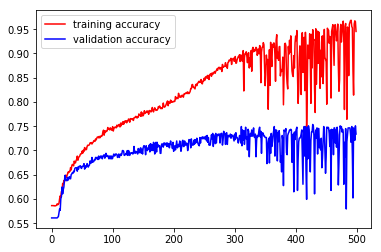

In [16]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

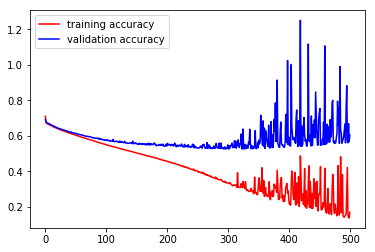

In [17]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [18]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 1s 365us/step - loss: 0.8302 - acc: 0.4241 - val_loss: 0.7070 - val_acc: 0.4533
Epoch 2/500
1646/1646 [==============================] - 0s 166us/step - loss: 0.6996 - acc: 0.4976 - val_loss: 0.6905 - val_acc: 0.5382
Epoch 3/500
1646/1646 [==============================] - 0s 163us/step - loss: 0.6895 - acc: 0.5413 - val_loss: 0.6900 - val_acc: 0.5538
Epoch 4/500
1646/1646 [==============================] - 0s 168us/step - loss: 0.6887 - acc: 0.5601 - val_loss: 0.6895 - val_acc: 0.5581
Epoch 5/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.6792 - acc: 0.5808 - val_loss: 0.6889 - val_acc: 0.5609
Epoch 6/500
1646/1646 [==============================] - 0s 163us/step - loss: 0.6800 - acc: 0.5784 - val_loss: 0.6880 - val_acc: 0.5609
Epoch 7/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.6791 - acc: 0.5820 - val_loss: 0.6854 - val_acc: 0

1646/1646 [==============================] - 0s 184us/step - loss: 0.6070 - acc: 0.6871 - val_loss: 0.6097 - val_acc: 0.6714
Epoch 61/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.6055 - acc: 0.6877 - val_loss: 0.6076 - val_acc: 0.6728
Epoch 62/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.5991 - acc: 0.7078 - val_loss: 0.6091 - val_acc: 0.6657
Epoch 63/500
1646/1646 [==============================] - 0s 174us/step - loss: 0.6018 - acc: 0.6938 - val_loss: 0.6050 - val_acc: 0.6714
Epoch 64/500
1646/1646 [==============================] - 0s 177us/step - loss: 0.5988 - acc: 0.7011 - val_loss: 0.6049 - val_acc: 0.6742
Epoch 65/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.6026 - acc: 0.6993 - val_loss: 0.6033 - val_acc: 0.6771
Epoch 66/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.5978 - acc: 0.6877 - val_loss: 0.6040 - val_acc: 0.6771
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 147us/step - loss: 0.5116 - acc: 0.7582 - val_loss: 0.5574 - val_acc: 0.6997
Epoch 179/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.5155 - acc: 0.7649 - val_loss: 0.5556 - val_acc: 0.7068
Epoch 180/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.5088 - acc: 0.7801 - val_loss: 0.5507 - val_acc: 0.7082
Epoch 181/500
1646/1646 [==============================] - 0s 141us/step - loss: 0.5118 - acc: 0.7716 - val_loss: 0.5522 - val_acc: 0.7054
Epoch 182/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.5109 - acc: 0.7673 - val_loss: 0.5543 - val_acc: 0.7068
Epoch 183/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.5128 - acc: 0.7710 - val_loss: 0.5527 - val_acc: 0.7110
Epoch 184/500
1646/1646 [==============================] - 0s 177us/step - loss: 0.5128 - acc: 0.7795 - val_loss: 0.5537 - val_acc: 0.7082
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 139us/step - loss: 0.4722 - acc: 0.7922 - val_loss: 0.5423 - val_acc: 0.7167
Epoch 238/500
1646/1646 [==============================] - 0s 147us/step - loss: 0.4810 - acc: 0.7837 - val_loss: 0.5399 - val_acc: 0.7181
Epoch 239/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.4754 - acc: 0.7849 - val_loss: 0.5416 - val_acc: 0.7167
Epoch 240/500
1646/1646 [==============================] - 0s 164us/step - loss: 0.4734 - acc: 0.7868 - val_loss: 0.5493 - val_acc: 0.7040
Epoch 241/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.4672 - acc: 0.7977 - val_loss: 0.5411 - val_acc: 0.7195
Epoch 242/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.4674 - acc: 0.7940 - val_loss: 0.5539 - val_acc: 0.6997
Epoch 243/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.4662 - acc: 0.7880 - val_loss: 0.5441 - val_acc: 0.7210
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 155us/step - loss: 0.4246 - acc: 0.8165 - val_loss: 0.5359 - val_acc: 0.7266
Epoch 297/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.4263 - acc: 0.8220 - val_loss: 0.5413 - val_acc: 0.7195
Epoch 298/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.4298 - acc: 0.8202 - val_loss: 0.5441 - val_acc: 0.7139
Epoch 299/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.4309 - acc: 0.8190 - val_loss: 0.5424 - val_acc: 0.7153
Epoch 300/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.4336 - acc: 0.8141 - val_loss: 0.5297 - val_acc: 0.7252
Epoch 301/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.4244 - acc: 0.8238 - val_loss: 0.5326 - val_acc: 0.7295
Epoch 302/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.4255 - acc: 0.8269 - val_loss: 0.5473 - val_acc: 0.7110
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 139us/step - loss: 0.3686 - acc: 0.8493 - val_loss: 0.5281 - val_acc: 0.7323
Epoch 356/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.3820 - acc: 0.8578 - val_loss: 0.5268 - val_acc: 0.7323
Epoch 357/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.3752 - acc: 0.8414 - val_loss: 0.5412 - val_acc: 0.7139
Epoch 358/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.3789 - acc: 0.8554 - val_loss: 0.5268 - val_acc: 0.7380
Epoch 359/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.3804 - acc: 0.8560 - val_loss: 0.5369 - val_acc: 0.7167
Epoch 360/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.3831 - acc: 0.8426 - val_loss: 0.5259 - val_acc: 0.7365
Epoch 361/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.3721 - acc: 0.8578 - val_loss: 0.5273 - val_acc: 0.7323
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 130us/step - loss: 0.3244 - acc: 0.8724 - val_loss: 0.5397 - val_acc: 0.7195
Epoch 415/500
1646/1646 [==============================] - 0s 127us/step - loss: 0.3249 - acc: 0.8785 - val_loss: 0.5268 - val_acc: 0.7337
Epoch 416/500
1646/1646 [==============================] - 0s 132us/step - loss: 0.3184 - acc: 0.8870 - val_loss: 0.5245 - val_acc: 0.7422
Epoch 417/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.3438 - acc: 0.8651 - val_loss: 0.5352 - val_acc: 0.7210
Epoch 418/500
1646/1646 [==============================] - 0s 175us/step - loss: 0.3232 - acc: 0.8779 - val_loss: 0.5627 - val_acc: 0.7153
Epoch 419/500
1646/1646 [==============================] - 0s 164us/step - loss: 0.3194 - acc: 0.8797 - val_loss: 0.5319 - val_acc: 0.7280
Epoch 420/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.3308 - acc: 0.8670 - val_loss: 0.5495 - val_acc: 0.7195
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 129us/step - loss: 0.2853 - acc: 0.9004 - val_loss: 0.5325 - val_acc: 0.7337
Epoch 474/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.2859 - acc: 0.8955 - val_loss: 0.5536 - val_acc: 0.7323
Epoch 475/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.2718 - acc: 0.9010 - val_loss: 0.5559 - val_acc: 0.7351
Epoch 476/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.2736 - acc: 0.9004 - val_loss: 0.5767 - val_acc: 0.7181
Epoch 477/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.2740 - acc: 0.9077 - val_loss: 0.5352 - val_acc: 0.7323
Epoch 478/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.2541 - acc: 0.9156 - val_loss: 0.5728 - val_acc: 0.7252
Epoch 479/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.2617 - acc: 0.9089 - val_loss: 0.5724 - val_acc: 0.7238
Epoch 480/500
1646/1646 [================

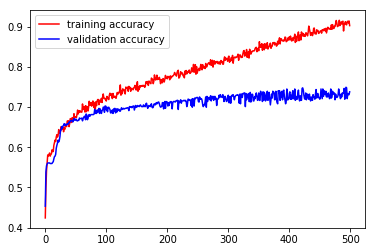

In [20]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

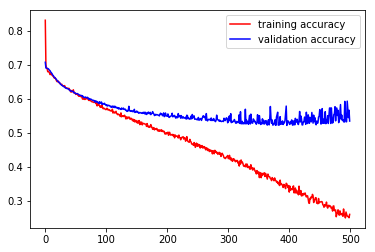

In [21]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [29]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [30]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 1s 415us/step - loss: 0.7117 - acc: 0.5182 - val_loss: 0.6815 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.7007 - acc: 0.5516 - val_loss: 0.6782 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.6898 - acc: 0.5656 - val_loss: 0.6758 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.6852 - acc: 0.5620 - val_loss: 0.6721 - val_acc: 0.5609
Epoch 5/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.6972 - acc: 0.5589 - val_loss: 0.6692 - val_acc: 0.5609
Epoch 6/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.6885 - acc: 0.5723 - val_loss: 0.6670 - val_acc: 0.5623
Epoch 7/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.6782 - acc: 0.5911 - val_loss: 0.6641 - val_acc: 0

1646/1646 [==============================] - 0s 158us/step - loss: 0.6149 - acc: 0.6762 - val_loss: 0.6106 - val_acc: 0.6714
Epoch 61/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.6186 - acc: 0.6719 - val_loss: 0.6087 - val_acc: 0.6756
Epoch 62/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.6244 - acc: 0.6543 - val_loss: 0.6092 - val_acc: 0.6756
Epoch 63/500
1646/1646 [==============================] - 0s 169us/step - loss: 0.6303 - acc: 0.6567 - val_loss: 0.6085 - val_acc: 0.6756
Epoch 64/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.6245 - acc: 0.6555 - val_loss: 0.6068 - val_acc: 0.6785
Epoch 65/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.6184 - acc: 0.6574 - val_loss: 0.6071 - val_acc: 0.6771
Epoch 66/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.6211 - acc: 0.6567 - val_loss: 0.6060 - val_acc: 0.6799
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 166us/step - loss: 0.5802 - acc: 0.7017 - val_loss: 0.5846 - val_acc: 0.6955
Epoch 120/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.5780 - acc: 0.7145 - val_loss: 0.5800 - val_acc: 0.6926
Epoch 121/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.5735 - acc: 0.7169 - val_loss: 0.5768 - val_acc: 0.6856
Epoch 122/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.5744 - acc: 0.7126 - val_loss: 0.5798 - val_acc: 0.6941
Epoch 123/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.5714 - acc: 0.7132 - val_loss: 0.5756 - val_acc: 0.6841
Epoch 124/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.5751 - acc: 0.6999 - val_loss: 0.5798 - val_acc: 0.6955
Epoch 125/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.5816 - acc: 0.7005 - val_loss: 0.5769 - val_acc: 0.6912
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 128us/step - loss: 0.5461 - acc: 0.7406 - val_loss: 0.5633 - val_acc: 0.6912
Epoch 179/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.5432 - acc: 0.7412 - val_loss: 0.5579 - val_acc: 0.7025
Epoch 180/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.5370 - acc: 0.7442 - val_loss: 0.5636 - val_acc: 0.6926
Epoch 181/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.5348 - acc: 0.7503 - val_loss: 0.5570 - val_acc: 0.7054
Epoch 182/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.5405 - acc: 0.7448 - val_loss: 0.5584 - val_acc: 0.7054
Epoch 183/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.5475 - acc: 0.7284 - val_loss: 0.5616 - val_acc: 0.6969
Epoch 184/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.5387 - acc: 0.7351 - val_loss: 0.5598 - val_acc: 0.7068
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 150us/step - loss: 0.5041 - acc: 0.7691 - val_loss: 0.5488 - val_acc: 0.7167
Epoch 238/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.4910 - acc: 0.7861 - val_loss: 0.5480 - val_acc: 0.7125
Epoch 239/500
1646/1646 [==============================] - 0s 162us/step - loss: 0.5061 - acc: 0.7758 - val_loss: 0.5454 - val_acc: 0.7082
Epoch 240/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.5100 - acc: 0.7600 - val_loss: 0.5573 - val_acc: 0.6941
Epoch 241/500
1646/1646 [==============================] - 0s 147us/step - loss: 0.5089 - acc: 0.7631 - val_loss: 0.5529 - val_acc: 0.7054
Epoch 242/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.4979 - acc: 0.7667 - val_loss: 0.5509 - val_acc: 0.7139
Epoch 243/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.5154 - acc: 0.7661 - val_loss: 0.5497 - val_acc: 0.7110
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 128us/step - loss: 0.4636 - acc: 0.7892 - val_loss: 0.5413 - val_acc: 0.7210
Epoch 297/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.4706 - acc: 0.7904 - val_loss: 0.5418 - val_acc: 0.7167
Epoch 298/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.4664 - acc: 0.7813 - val_loss: 0.5426 - val_acc: 0.7153
Epoch 299/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.4647 - acc: 0.7934 - val_loss: 0.5384 - val_acc: 0.7252
Epoch 300/500
1646/1646 [==============================] - 0s 129us/step - loss: 0.4721 - acc: 0.7953 - val_loss: 0.5507 - val_acc: 0.7068
Epoch 301/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.4507 - acc: 0.8038 - val_loss: 0.5574 - val_acc: 0.6912
Epoch 302/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.4590 - acc: 0.7983 - val_loss: 0.5389 - val_acc: 0.7224
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 167us/step - loss: 0.4204 - acc: 0.8281 - val_loss: 0.5414 - val_acc: 0.7110
Epoch 356/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.4232 - acc: 0.8141 - val_loss: 0.5305 - val_acc: 0.7295
Epoch 357/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.4237 - acc: 0.8177 - val_loss: 0.5336 - val_acc: 0.7266
Epoch 358/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.4204 - acc: 0.8262 - val_loss: 0.5407 - val_acc: 0.7110
Epoch 359/500
1646/1646 [==============================] - 0s 167us/step - loss: 0.4304 - acc: 0.8171 - val_loss: 0.5324 - val_acc: 0.7323
Epoch 360/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.4160 - acc: 0.8232 - val_loss: 0.5319 - val_acc: 0.7323
Epoch 361/500
1646/1646 [==============================] - 0s 170us/step - loss: 0.4161 - acc: 0.8232 - val_loss: 0.5311 - val_acc: 0.7337
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 130us/step - loss: 0.3678 - acc: 0.8615 - val_loss: 0.5266 - val_acc: 0.7351
Epoch 415/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.3737 - acc: 0.8530 - val_loss: 0.5308 - val_acc: 0.7309
Epoch 416/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3798 - acc: 0.8524 - val_loss: 0.5450 - val_acc: 0.7125
Epoch 417/500
1646/1646 [==============================] - 0s 174us/step - loss: 0.3606 - acc: 0.8584 - val_loss: 0.5307 - val_acc: 0.7295
Epoch 418/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.3769 - acc: 0.8433 - val_loss: 0.5418 - val_acc: 0.7110
Epoch 419/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.3689 - acc: 0.8487 - val_loss: 0.5389 - val_acc: 0.7181
Epoch 420/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.3707 - acc: 0.8512 - val_loss: 0.5335 - val_acc: 0.7309
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 160us/step - loss: 0.3196 - acc: 0.8827 - val_loss: 0.5674 - val_acc: 0.7252
Epoch 474/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.3300 - acc: 0.8736 - val_loss: 0.5297 - val_acc: 0.7394
Epoch 475/500
1646/1646 [==============================] - 0s 163us/step - loss: 0.3083 - acc: 0.8870 - val_loss: 0.5801 - val_acc: 0.7181
Epoch 476/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.3061 - acc: 0.8815 - val_loss: 0.5366 - val_acc: 0.7295
Epoch 477/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.3238 - acc: 0.8712 - val_loss: 0.5834 - val_acc: 0.7210
Epoch 478/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.3188 - acc: 0.8682 - val_loss: 0.5400 - val_acc: 0.7266
Epoch 479/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.3036 - acc: 0.8876 - val_loss: 0.5881 - val_acc: 0.7153
Epoch 480/500
1646/1646 [================

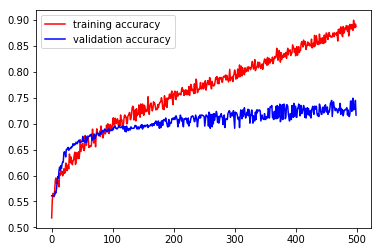

In [31]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

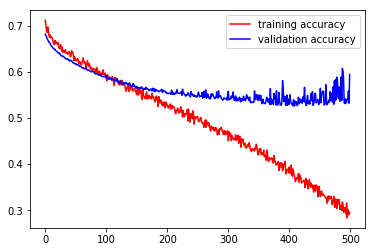

In [32]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

### Early Stopping

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
estop = EarlyStopping(monitor='val_acc', patience=10)

In [ ]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512,validation_data=(X_valid,Y_valid), callbacks=[estop])

## Problem 5 - More time to Train

### BatchNormalization

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=512,validation_data=(X_valid,Y_valid))

## Problem 6 - Not an Appropriate Architecture for the problem

In [ ]:
from keras.applications import vgg16, resnet50

In [ ]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc, target_size=(224, 224))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [ ]:
train_x = vgg16.preprocess_input(images, mode='tf')
train_y = data.emergency_or_not.values

In [ ]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [ ]:
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [ ]:
for layer in base_model.layers:
    layer.Trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
base_model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=3, batch_size=32,validation_data=(X_valid,Y_valid))